Vincent COTELLA​

Elvin CHA ​

Gaspard DEVOIVRE​

# Analysis For Online News Popularity

# Introduction

This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity). 

Loading all librairies that we are going to use during our project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data of Online News Popularity.

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
df.head(20)

url  ...   shares
0   http://mashable.com/2013/01/07/amazon-instant-...  ...      593
1   http://mashable.com/2013/01/07/ap-samsung-spon...  ...      711
2   http://mashable.com/2013/01/07/apple-40-billio...  ...     1500
3   http://mashable.com/2013/01/07/astronaut-notre...  ...     1200
4    http://mashable.com/2013/01/07/att-u-verse-apps/  ...      505
5    http://mashable.com/2013/01/07/beewi-smart-toys/  ...      855
6   http://mashable.com/2013/01/07/bodymedia-armba...  ...      556
7    http://mashable.com/2013/01/07/canon-poweshot-n/  ...      891
8   http://mashable.com/2013/01/07/car-of-the-futu...  ...     3600
9   http://mashable.com/2013/01/07/chuck-hagel-web...  ...      710
10  http://mashable.com/2013/01/07/cosmic-events-d...  ...     2200
11   http://mashable.com/2013/01/07/crayon-creatures/  ...     1900
12      http://mashable.com/2013/01/07/creature-cups/  ...      823
13          http://mashable.com/2013/01/07/dad-jokes/  ...    10000
14  http://mashable.com/2013/01/07/downton-abbey-t...  ...      761
15  http://mashable.com/2013/01/07/earth-size-plan...  ...     1600
16          http://mashable.com/2013/01/07/echo-game/  ...    13600
17  http://mashable.com/2013/01/07/entrepreneur-tr...  ...     3100
18  http://mashable.com/2013/01/07/facebook-sick-app/  ...     5700
19  http://mashable.com/2013/01/07/felt-audio-puls...  ...    17100

[20 rows x 61 columns]

# Data Processing


In [4]:
df.describe()

timedelta  ...         shares
count  39644.000000  ...   39644.000000
mean     354.530471  ...    3395.380184
std      214.163767  ...   11626.950749
min        8.000000  ...       1.000000
25%      164.000000  ...     946.000000
50%      339.000000  ...    1400.000000
75%      542.000000  ...    2800.000000
max      731.000000  ...  843300.000000

[8 rows x 60 columns]

In [5]:
df.drop(labels=['url'], axis = 1, inplace=True)
df.head()

timedelta   n_tokens_title  ...   abs_title_sentiment_polarity   shares
0       731.0             12.0  ...                       0.187500      593
1       731.0              9.0  ...                       0.000000      711
2       731.0              9.0  ...                       0.000000     1500
3       731.0              9.0  ...                       0.000000     1200
4       731.0             13.0  ...                       0.136364      505

[5 rows x 60 columns]

In [6]:
share_data = df[' shares']
df[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

## Grading the Shares

- Exceptional = Top ≈1%
- Excellent = Top ≈3%
- Very Good = Top ≈8%
- Good = Top ≈50%
- Average = Top ≈80%
- Poor = worst ≈20%
- Very Poor = worst ≈7.2%

We have created a new column, 'popularity,' to determine the popularity of an article.

In [7]:
# create label grades for the classes
share_label = list()
for share in share_data:
    if share <= 645:
        share_label.append('Very Poor')
    elif share > 645 and share <= 861:
        share_label.append('Poor')
    elif share > 861 and share <= 1400:
        share_label.append('Average')
    elif share > 1400 and share <= 7000:
        share_label.append('Good')
    elif share > 7000 and share <= 15000:
        share_label.append('Very Good')
    elif share > 15000 and share <= 35000:
        share_label.append('Excellent')
    else:
        share_label.append('Exceptional')

# Update this class label into the dataframe
df = pd.concat([df, pd.DataFrame(share_label, columns=['popularity'])], axis=1)
df.head(4)

timedelta   n_tokens_title  ...   shares  popularity
0       731.0             12.0  ...      593   Very Poor
1       731.0              9.0  ...      711        Poor
2       731.0              9.0  ...     1500        Good
3       731.0              9.0  ...     1200     Average

[4 rows x 61 columns]

We can check the new class balance.

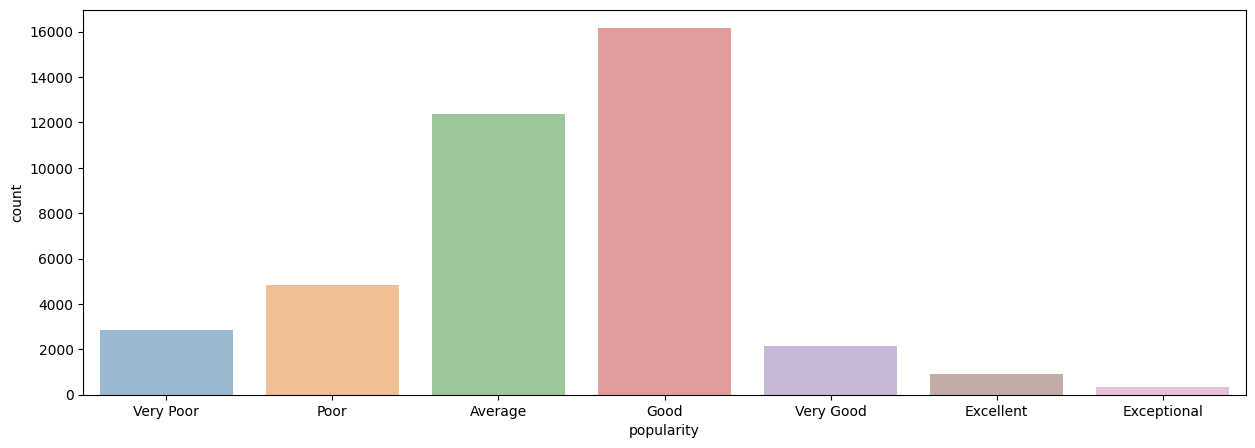

In [8]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='popularity', data=df, order=['Very Poor', 'Poor', 'Average', 'Good', 'Very Good', 'Excellent', 'Exceptional'], alpha=0.5)

## Merging Weekdays and Data Channels

We will merge the columns of the days of the week from the dataframe into a single column containing the names of the corresponding days, and also merge the columns of the data channels into a single column containing the names of the corresponding channels.

In [9]:
# Extracting columns related to days of the week
publishdayMerge=df[[' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday' ]]

# Temporary list to store merged day names
temp_arr=[]

# Looping through each row and column in the 'publishdayMerge' 
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        # Checking if the value is 1
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tuesday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')
            
# Merging the data channels as one single column
DataChannelMerge=df[[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world' ]]

# List to store merged data channel names
DataChannel_arr=[]

# Looping through each row and column in the 'DataChannelMerge' 
for r in list(range(DataChannelMerge.shape[0])):
        # Checking if no channel is selected
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
        
        # Checking each channel and appending the corresponding name to the list
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

Now that we created two lists where we have in a single column all the weekdays and in another one all the data channels we can add them to the dataframe and drop the old data.

In [10]:
# Merge the the new data (temp_arr and DataChannel_arr) into the dataframe 
df.insert(loc=11, column='weekdays', value=temp_arr)
df.insert(loc=12, column='data_channel', value=DataChannel_arr)

# Now drop the old data
df.drop(labels=[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world', 
                 ' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday'], axis = 1, inplace=True)
print(df.shape)
df.head(n=4)

(39644, 50)


timedelta   n_tokens_title  ...   shares  popularity
0       731.0             12.0  ...      593   Very Poor
1       731.0              9.0  ...      711        Poor
2       731.0              9.0  ...     1500        Good
3       731.0              9.0  ...     1200     Average

[4 rows x 50 columns]

In [11]:
# on enleve les articles qui n'ont pas de mot données qui ne servent a rien
print ("before noise removal - ",df.shape)
df  = df[df[' n_tokens_content'] != 0]
df  = df[df[' n_tokens_title'] != 0]
print ("After noise removal - ",df.shape)

before noise removal -  (39644, 50)
After noise removal -  (38463, 50)


In [12]:
# let's check if it all went good and we have the new columns and if we successfully droped the others
df.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', 'weekdays', 'data_channel', ' num_keywords',
       ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max',
       ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       ' title_subjectiv

## Removing the last irrelevant labels

In [13]:
# by looking at the different columns we noticed the column 'n_non_stop_words' contains 0 on a lot of attributes
print(df[' n_non_stop_words'].describe())
# we concluded that this column is irrelevant with very small variations in data that do not represent meaningful information or patterns. Let's drop it out of the dataframe.
df.drop(labels=[' n_non_stop_words'], axis = 1, inplace=True)

count    38463.000000
mean         1.027065
std          5.307978
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name:  n_non_stop_words, dtype: float64


In [14]:
df

timedelta   n_tokens_title  ...   shares  popularity
0           731.0             12.0  ...      593   Very Poor
1           731.0              9.0  ...      711        Poor
2           731.0              9.0  ...     1500        Good
3           731.0              9.0  ...     1200     Average
4           731.0             13.0  ...      505   Very Poor
...           ...              ...  ...      ...         ...
39639         8.0             11.0  ...     1800        Good
39640         8.0             12.0  ...     1900        Good
39641         8.0             10.0  ...     1900        Good
39642         8.0              6.0  ...     1100     Average
39643         8.0             10.0  ...     1300     Average

[38463 rows x 49 columns]

In [15]:
# There doesn't seem to be any issues with scales differences between columns, however, to be safe we can normalize the numerical columns of the dataset to facilitate training. 

# First let's save a copy of the current state of the database for later convenience
from copy import copy
df_old = copy(df) 

from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for normalization
numerical_columns = df.select_dtypes(include=['float64']).columns
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

timedelta   n_tokens_title  ...   shares  popularity
0    1.741852         0.765258  ...      593   Very Poor
1    1.741852        -0.654006  ...      711        Poor
2    1.741852        -0.654006  ...     1500        Good
3    1.741852        -0.654006  ...     1200     Average
4    1.741852         1.238345  ...      505   Very Poor

[5 rows x 49 columns]

In [16]:
# Let's make sure the normalization went according to plan : 

# To do so we'll display the mean and standard deviation for each numerical (float64) column

numerical_columns = df.select_dtypes(include=['float64']).columns
means = df[numerical_columns].mean()
stds = df[numerical_columns].std()

# Now let's check if mean is close to 0 and std is close to 1 +/- 0.01
threshold = 0.01

is_normalized = all(abs(means) < threshold) and all(abs(stds - 1) < threshold)

if is_normalized:
    print("The dataset is properly normalized.\n")
else:
    print("The dataset is not properly normalized.\n")
    
print("Means after normalization:\n", means)
print("\nStandard deviations after normalization:\n", stds)

The dataset is properly normalized.

Means after normalization:
  timedelta                       7.093789e-17
 n_tokens_title                  2.128137e-16
 n_tokens_content               -4.729193e-17
 n_unique_tokens                -1.847341e-18
 n_non_stop_unique_tokens       -3.177426e-17
 num_hrefs                      -8.867236e-18
 num_self_hrefs                 -1.773447e-17
 num_imgs                       -8.867236e-18
 num_videos                     -1.921235e-17
 average_token_length           -9.901747e-16
 num_keywords                    1.418758e-16
 kw_min_min                     -1.773447e-16
 kw_max_min                     -5.911491e-18
 kw_avg_min                     -3.251320e-17
 kw_min_max                      1.182298e-17
 kw_max_max                      7.093789e-17
 kw_avg_max                     -1.536988e-16
 kw_min_avg                      1.596103e-16
 kw_max_avg                      7.980513e-17
 kw_avg_avg                      8.460821e-17
 self_reference

To sum up the data cleaning here are the steps we did :

1. We loaded the data into a new datframe named 'df' and droped the column 'url'
2. We created a new column 'popularity' based on the amount of shares of an article 
3. We merged the publish weekdays into a single column and for the data channels we did the same thing 
4. We removed 'n_non_stop_words'
5. To finish, we normalized the numerical values of the data

## 

# Data visualization

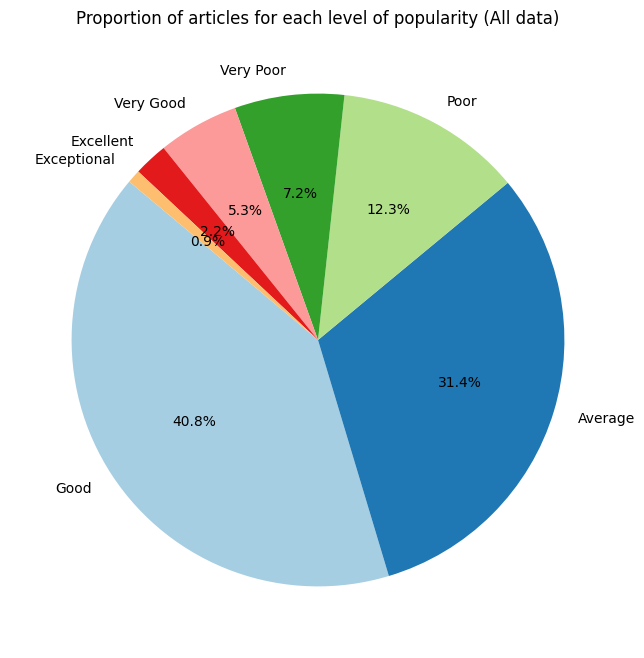

In [17]:
popularity_counts = df['popularity'].value_counts(normalize=True)

# Création du camembert
plt.figure(figsize=(8, 8))
plt.pie(popularity_counts, labels=popularity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of articles for each level of popularity (All data)')
plt.show()

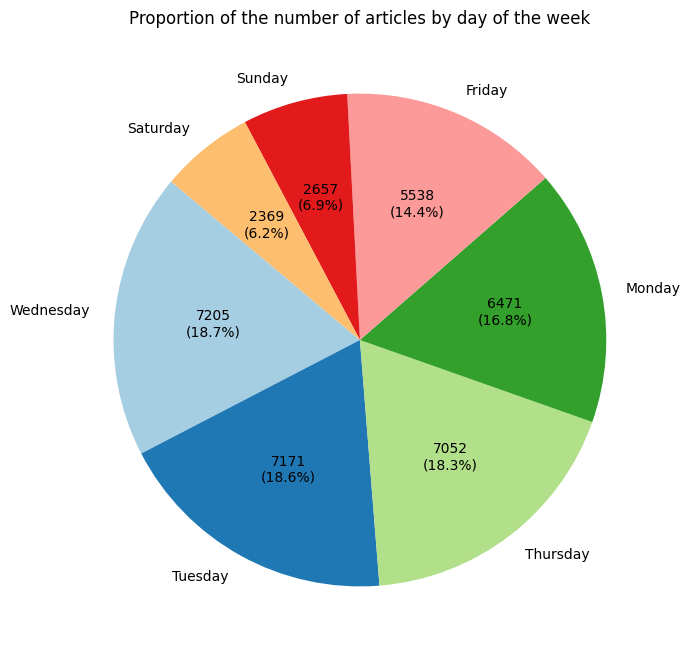

In [18]:
weekday_counts = df['weekdays'].value_counts()
labels = weekday_counts.index
sizes = weekday_counts.values

# Création du camembert avec compteur
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(sizes) / 100, p),
        startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of the number of articles by day of the week' )
plt.show()

We can see that the articles are quit good distributed except the saturday and sunday we notice that there are half as many articles as on weekdays.

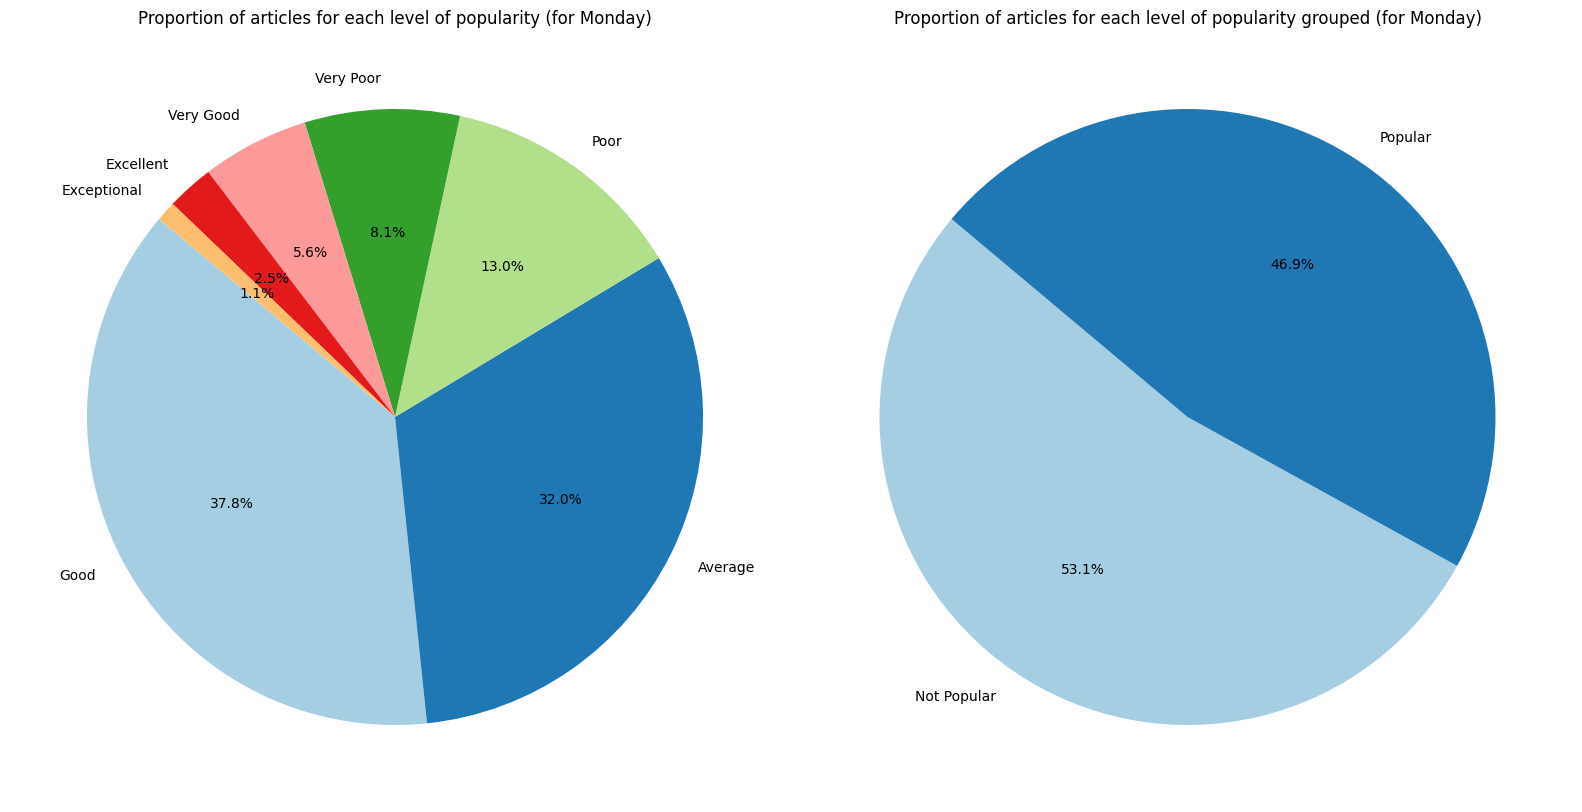

In [19]:
df_day = df[df['weekdays'] == 'Monday']

# Créer une figure avec une grille de 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Premier sous-graphique : Proportion d'articles pour chaque niveau de popularité
popularity_counts = df_day['popularity'].value_counts(normalize=True)
axes[0].pie(popularity_counts, labels=popularity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Proportion of articles for each level of popularity (for Monday)')

# Regrouper les catégories de popularité
df_day['popularity_grouped'] = df_day['popularity'].apply(lambda x: 'Not Popular' if x in ['Poor', 'Very Poor', 'Average'] else 'Popular')

# Deuxième sous-graphique : Proportion d'articles pour chaque niveau de popularité regroupé
popularity_counts_grouped = df_day['popularity_grouped'].value_counts(normalize=True)
axes[1].pie(popularity_counts_grouped, labels=popularity_counts_grouped.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Proportion of articles for each level of popularity grouped (for Monday)')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

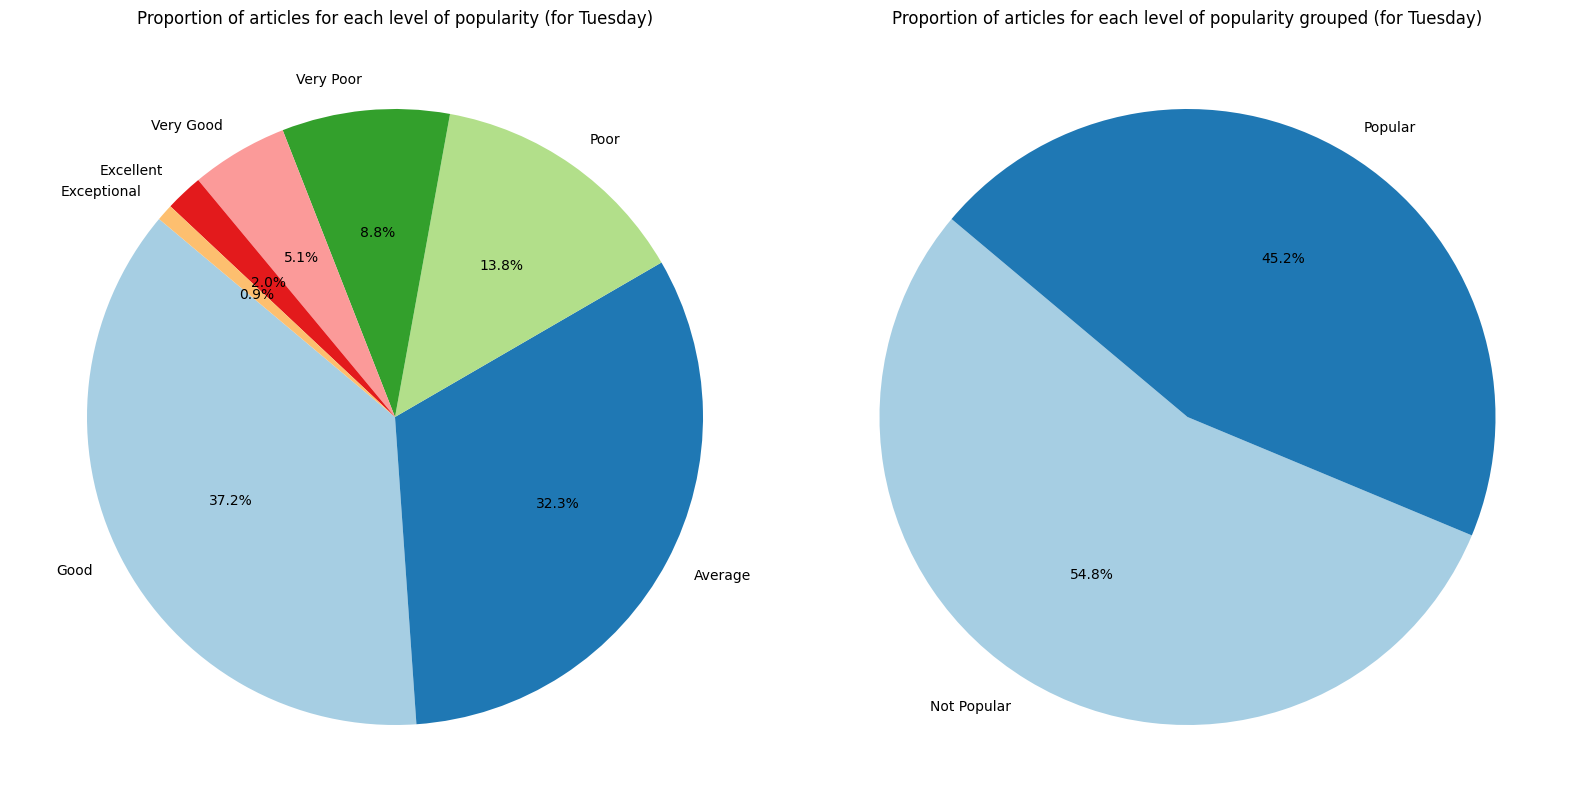

In [20]:
df_day = df[df['weekdays'] == 'Tuesday']

# Créer une figure avec une grille de 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Premier sous-graphique : Proportion d'articles pour chaque niveau de popularité
popularity_counts = df_day['popularity'].value_counts(normalize=True)
axes[0].pie(popularity_counts, labels=popularity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Proportion of articles for each level of popularity (for Tuesday)')

# Regrouper les catégories de popularité
df_day['popularity_grouped'] = df_day['popularity'].apply(lambda x: 'Not Popular' if x in ['Poor', 'Very Poor', 'Average'] else 'Popular')

# Deuxième sous-graphique : Proportion d'articles pour chaque niveau de popularité regroupé
popularity_counts_grouped = df_day['popularity_grouped'].value_counts(normalize=True)
axes[1].pie(popularity_counts_grouped, labels=popularity_counts_grouped.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Proportion of articles for each level of popularity grouped (for Tuesday)')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

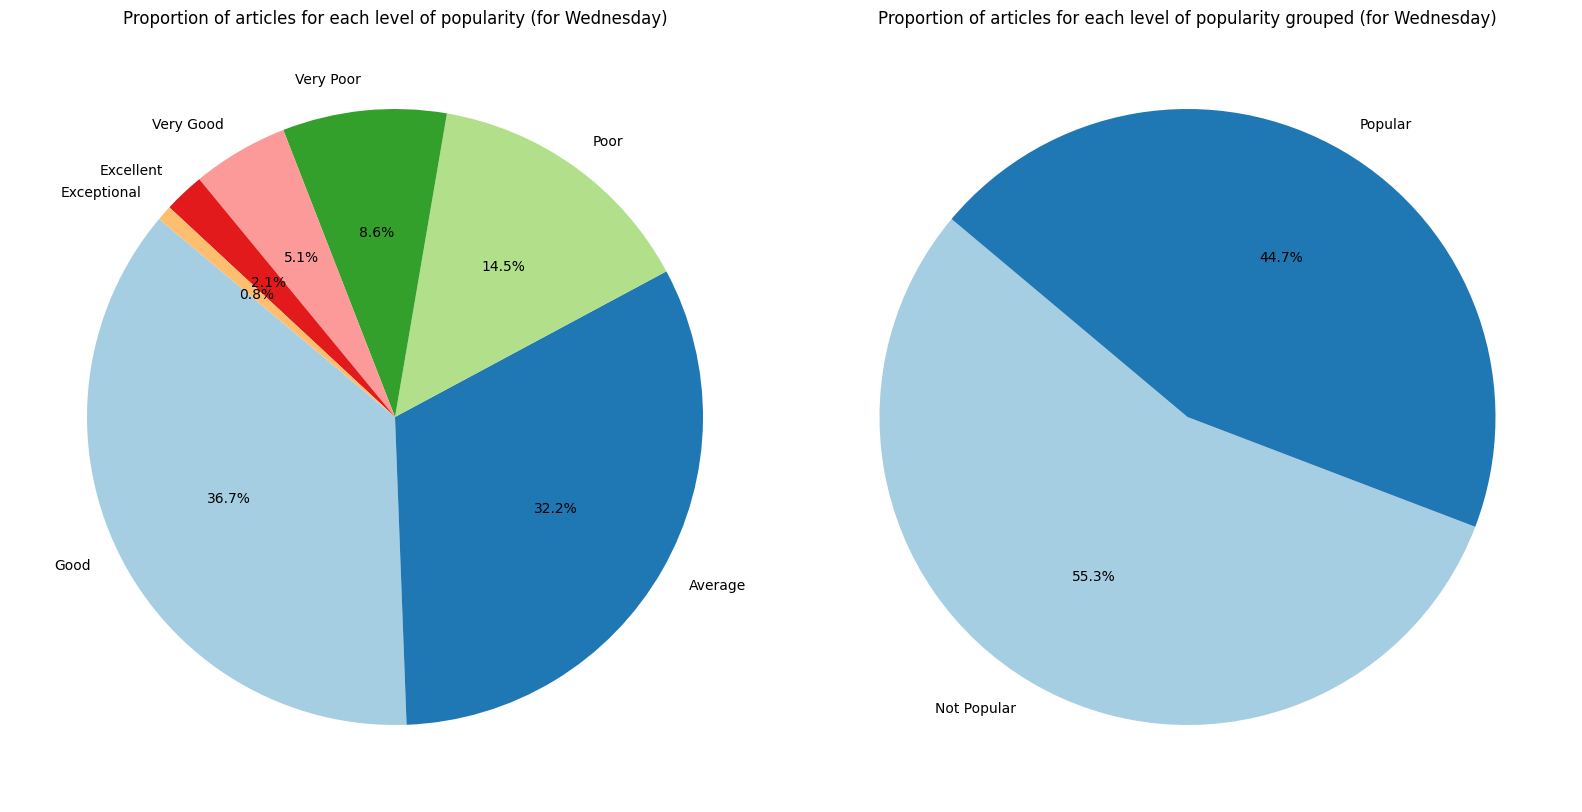

In [21]:
df_day = df[df['weekdays'] == 'Wednesday']

# Créer une figure avec une grille de 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Premier sous-graphique : Proportion d'articles pour chaque niveau de popularité
popularity_counts = df_day['popularity'].value_counts(normalize=True)
axes[0].pie(popularity_counts, labels=popularity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Proportion of articles for each level of popularity (for Wednesday)')

# Regrouper les catégories de popularité
df_day['popularity_grouped'] = df_day['popularity'].apply(lambda x: 'Not Popular' if x in ['Poor', 'Very Poor', 'Average'] else 'Popular')

# Deuxième sous-graphique : Proportion d'articles pour chaque niveau de popularité regroupé
popularity_counts_grouped = df_day['popularity_grouped'].value_counts(normalize=True)
axes[1].pie(popularity_counts_grouped, labels=popularity_counts_grouped.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Proportion of articles for each level of popularity grouped (for Wednesday)')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

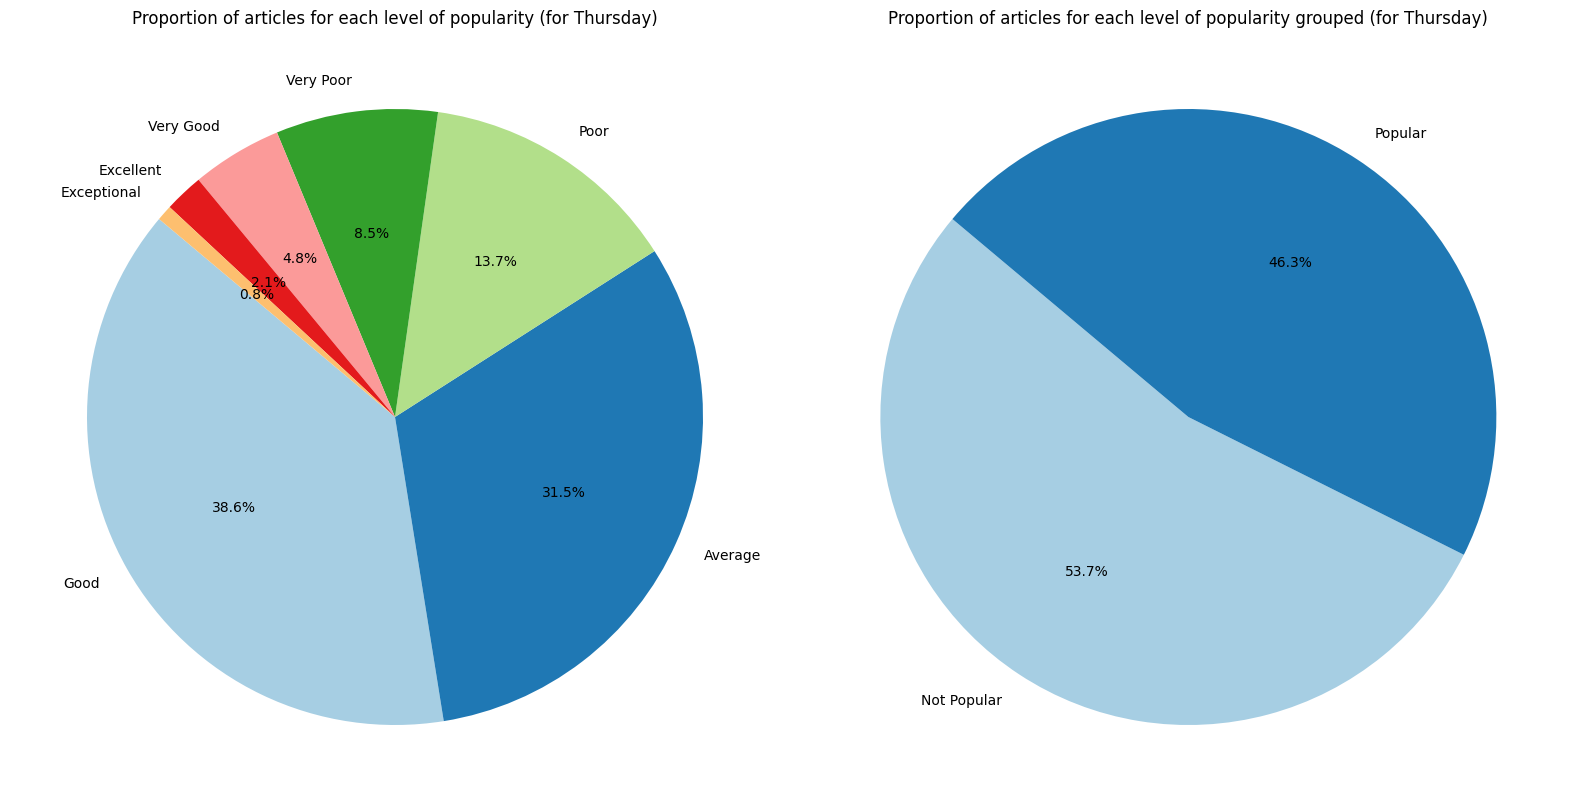

In [22]:
df_day = df[df['weekdays'] == 'Thursday']

# Créer une figure avec une grille de 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Premier sous-graphique : Proportion d'articles pour chaque niveau de popularité
popularity_counts = df_day['popularity'].value_counts(normalize=True)
axes[0].pie(popularity_counts, labels=popularity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Proportion of articles for each level of popularity (for Thursday)')

# Regrouper les catégories de popularité
df_day['popularity_grouped'] = df_day['popularity'].apply(lambda x: 'Not Popular' if x in ['Poor', 'Very Poor', 'Average'] else 'Popular')

# Deuxième sous-graphique : Proportion d'articles pour chaque niveau de popularité regroupé
popularity_counts_grouped = df_day['popularity_grouped'].value_counts(normalize=True)
axes[1].pie(popularity_counts_grouped, labels=popularity_counts_grouped.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Proportion of articles for each level of popularity grouped (for Thursday)')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

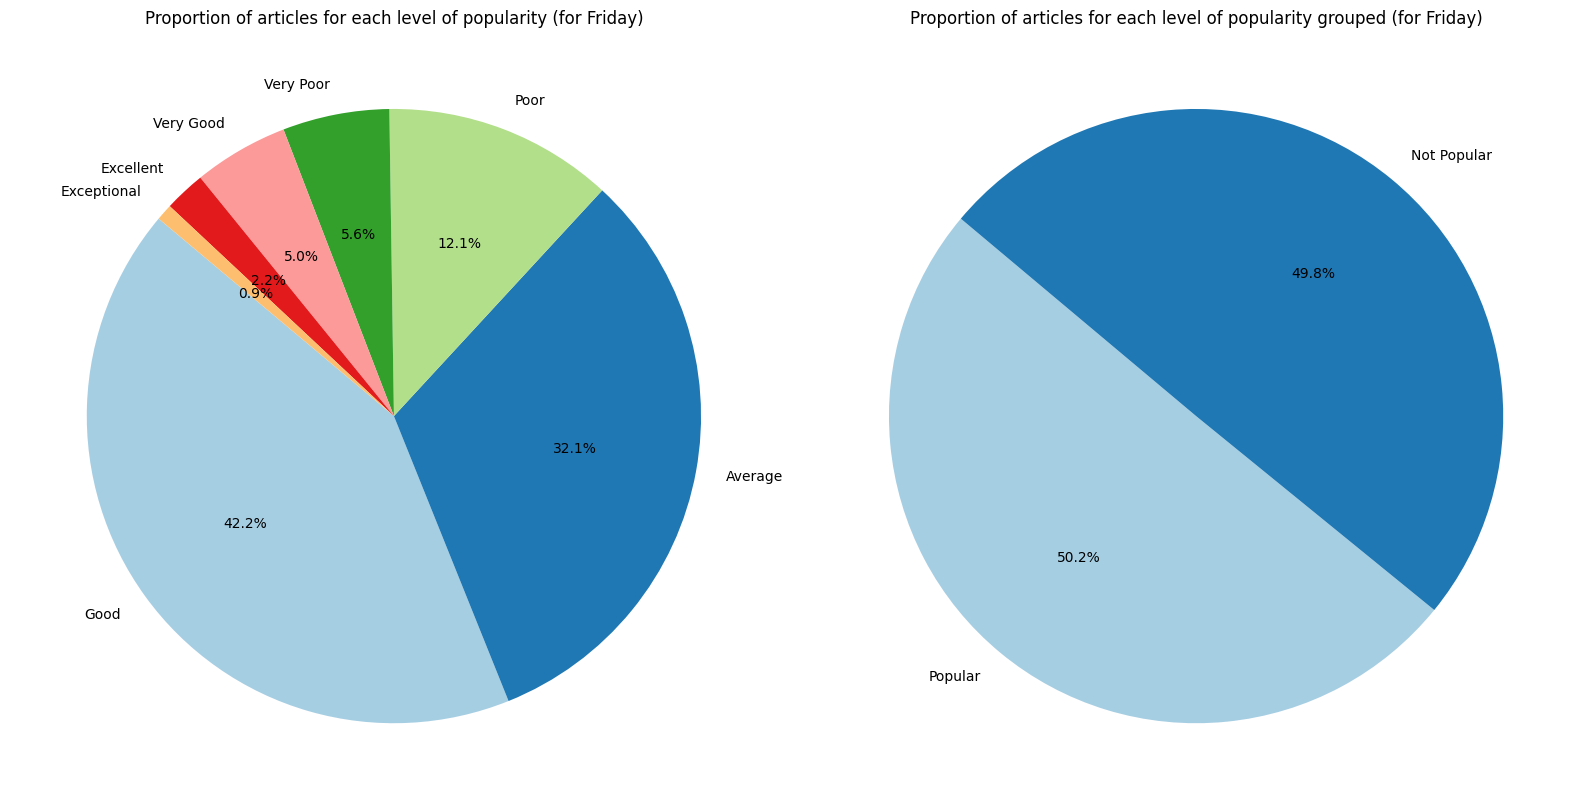

In [23]:
df_day = df[df['weekdays'] == 'Friday']

# Créer une figure avec une grille de 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Premier sous-graphique : Proportion d'articles pour chaque niveau de popularité
popularity_counts = df_day['popularity'].value_counts(normalize=True)
axes[0].pie(popularity_counts, labels=popularity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Proportion of articles for each level of popularity (for Friday)')

# Regrouper les catégories de popularité
df_day['popularity_grouped'] = df_day['popularity'].apply(lambda x: 'Not Popular' if x in ['Poor', 'Very Poor', 'Average'] else 'Popular')

# Deuxième sous-graphique : Proportion d'articles pour chaque niveau de popularité regroupé
popularity_counts_grouped = df_day['popularity_grouped'].value_counts(normalize=True)
axes[1].pie(popularity_counts_grouped, labels=popularity_counts_grouped.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Proportion of articles for each level of popularity grouped (for Friday)')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

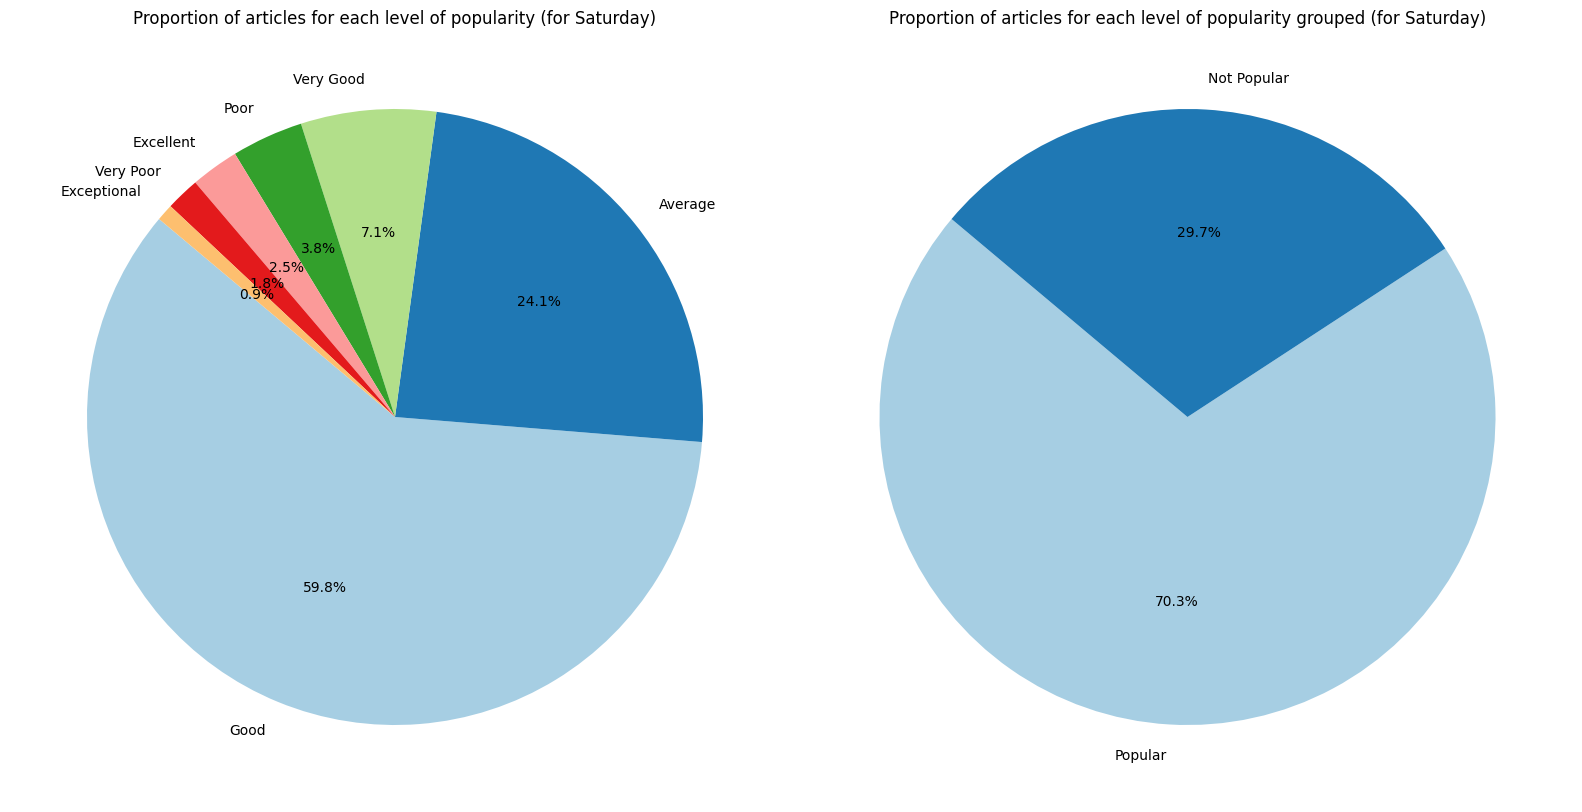

In [24]:
df_day = df[df['weekdays'] == 'Saturday']

# Créer une figure avec une grille de 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Premier sous-graphique : Proportion d'articles pour chaque niveau de popularité
popularity_counts = df_day['popularity'].value_counts(normalize=True)
axes[0].pie(popularity_counts, labels=popularity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Proportion of articles for each level of popularity (for Saturday)')

# Regrouper les catégories de popularité
df_day['popularity_grouped'] = df_day['popularity'].apply(lambda x: 'Not Popular' if x in ['Poor', 'Very Poor', 'Average'] else 'Popular')

# Deuxième sous-graphique : Proportion d'articles pour chaque niveau de popularité regroupé
popularity_counts_grouped = df_day['popularity_grouped'].value_counts(normalize=True)
axes[1].pie(popularity_counts_grouped, labels=popularity_counts_grouped.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Proportion of articles for each level of popularity grouped (for Saturday)')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

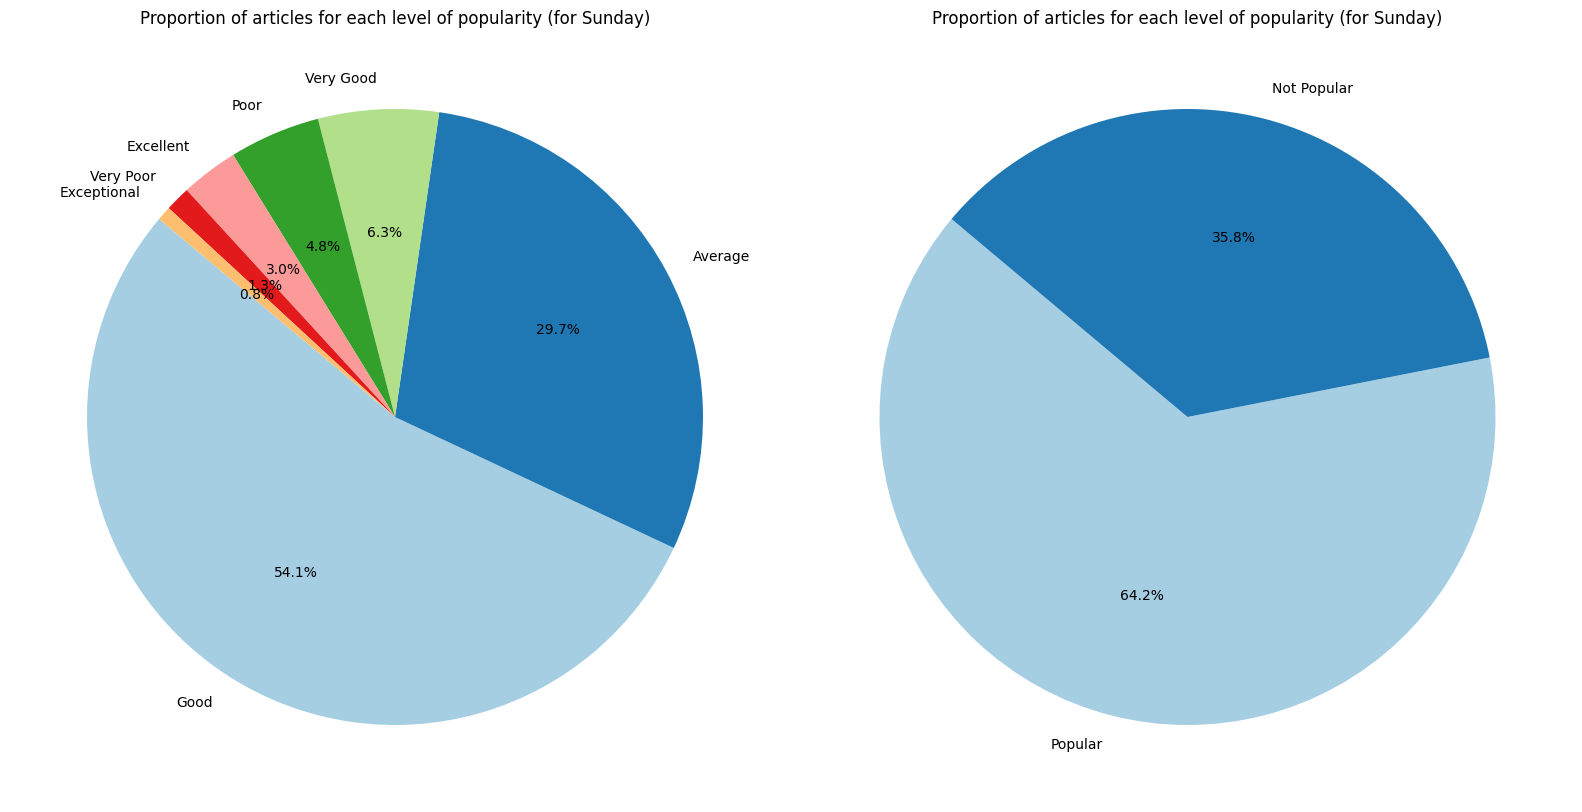

In [25]:
df_day = df[df['weekdays'] == 'Sunday']

# Créer une figure avec une grille de 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Premier sous-graphique : Proportion d'articles pour chaque niveau de popularité
popularity_counts = df_day['popularity'].value_counts(normalize=True)
axes[0].pie(popularity_counts, labels=popularity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Proportion of articles for each level of popularity (for Sunday)')

# Regrouper les catégories de popularité
df_day['popularity_grouped'] = df_day['popularity'].apply(lambda x: 'Not Popular' if x in ['Poor', 'Very Poor', 'Average'] else 'Popular')

# Deuxième sous-graphique : Proportion d'articles pour chaque niveau de popularité regroupé
popularity_counts_grouped = df_day['popularity_grouped'].value_counts(normalize=True)
axes[1].pie(popularity_counts_grouped, labels=popularity_counts_grouped.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Proportion of articles for each level of popularity (for Sunday)')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

![image](image.png)


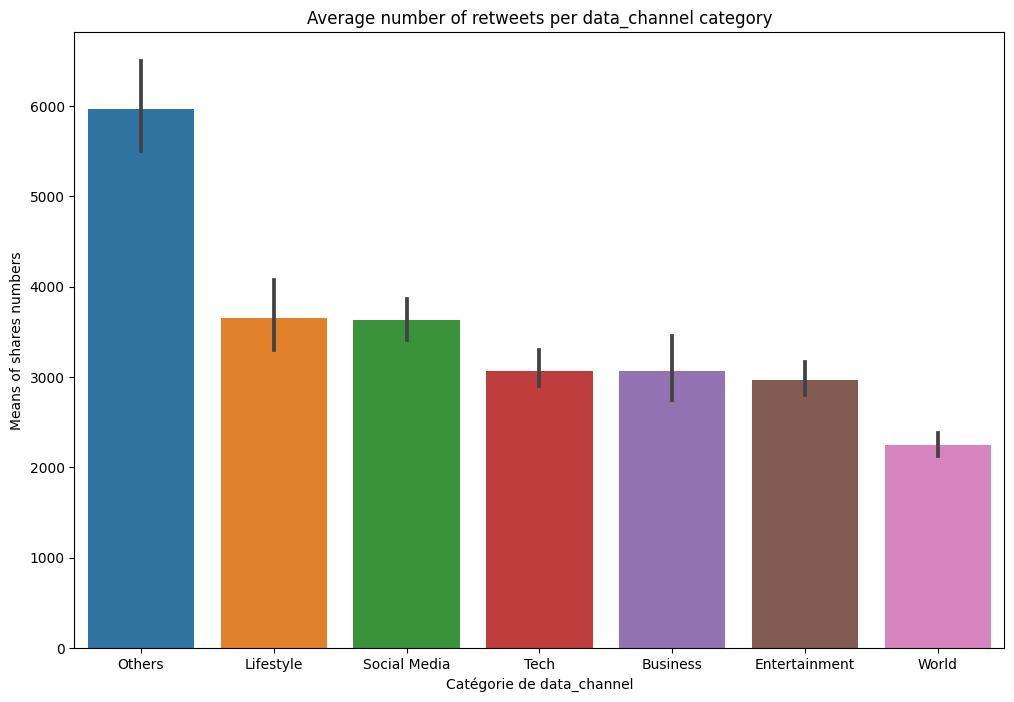

In [26]:
# Calculer la moyenne du nombre de retweets pour chaque catégorie de data_channel
average_shares_by_channel = df.groupby('data_channel')[' shares'].mean().reset_index()

# Trier les catégories par ordre décroissant de moyenne
average_shares_by_channel = average_shares_by_channel.sort_values(by=' shares', ascending=False)

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x='data_channel', y=' shares', data=df, order=average_shares_by_channel['data_channel'])
plt.title('Average number of retweets per data_channel category')
plt.xlabel('Catégorie de data_channel')
plt.ylabel('Means of shares numbers')
plt.show()

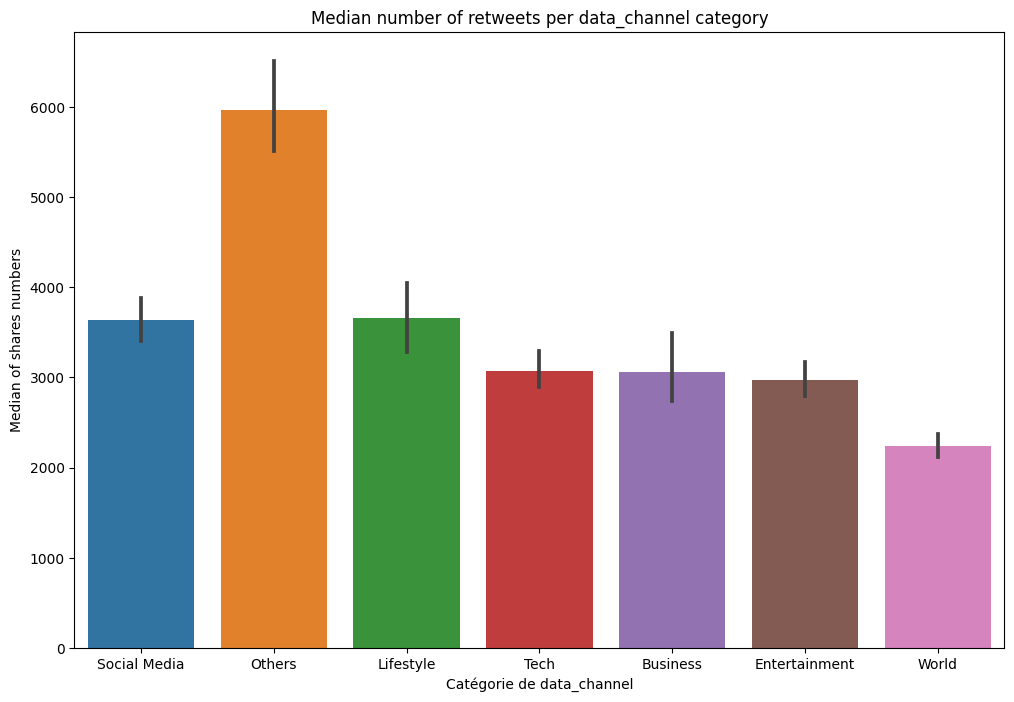

In [27]:
median_shares_by_channel = df.groupby('data_channel')[' shares'].median().reset_index()

# Trier les catégories par ordre décroissant de médiane
median_shares_by_channel = median_shares_by_channel.sort_values(by=' shares', ascending=False)

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x='data_channel', y=' shares', data=df, order=median_shares_by_channel['data_channel'])
plt.title('Median number of retweets per data_channel category')
plt.xlabel('Catégorie de data_channel')
plt.ylabel('Median of shares numbers')
plt.show()

These 2 graph show us that the best category is Others, followed by social media and lifestyle.
We can see that the World category is less attractive for people.

In [28]:
# Let's map popularity for ease of use with certain plots
from copy import copy
df_copy = copy(df)

popularity_mapping = {
    'Very Poor': 1,
    'Poor': 2,
    'Good': 3,
    'Average': 4,
    'Very Good': 5,
    'Excellent': 6,
    'Exceptional': 7
}

df_copy['popularity_numeric'] = df_copy['popularity'].map(popularity_mapping)

## Word Length

Let's look at how the average length of words or token are correlated to the popularity of the article :

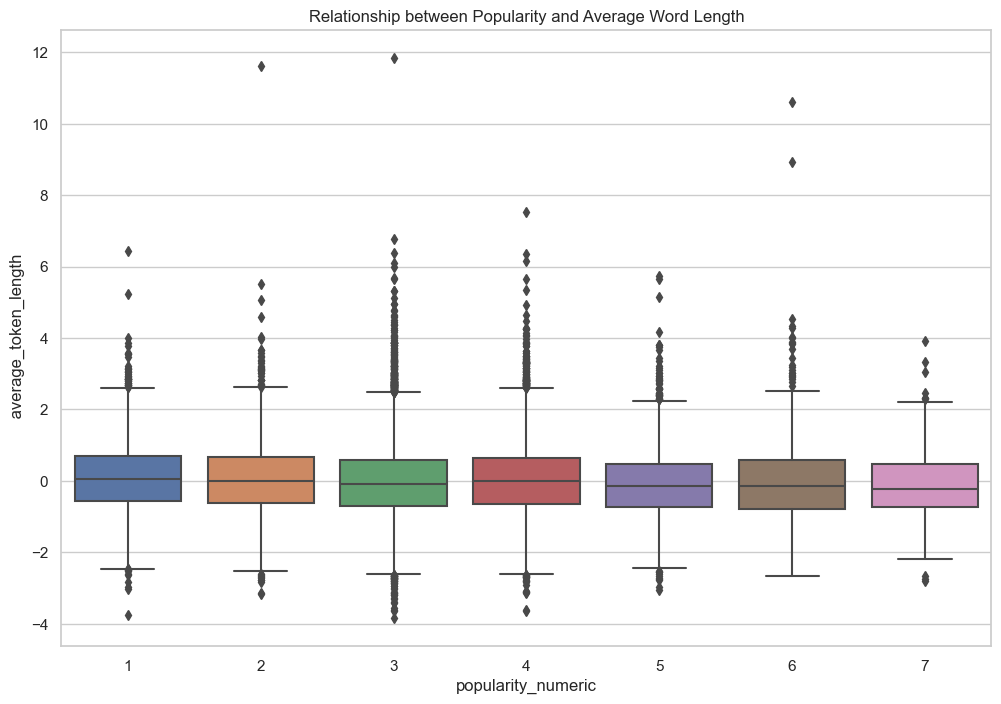

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Let's use a Boxplot
sns.boxplot(x='popularity_numeric', y=' average_token_length', data=df_copy)
plt.title('Relationship between Popularity and Average Word Length')
plt.show()

As we can see, on average excellent and exceptional articles contain words with slightly less characters than other articles.
Let's investigate!

(0, 49)


<AxesSubplot: xlabel=' average_token_length', ylabel=' shares'>

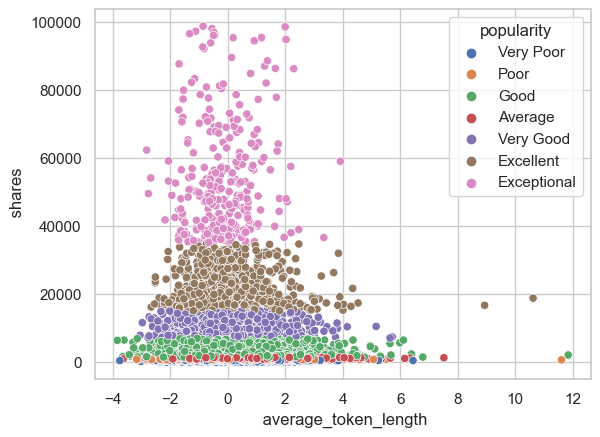

In [30]:
# Scatter Plot

# Some outliers are interfering with the integrety of the plot
temp_df = copy(df_copy)
temp_df = copy(temp_df[temp_df[' shares'] <= 100000])
noise_df  = copy(df_old)
noise_df  = copy(noise_df[noise_df[' average_token_length'] == 0])
print (noise_df.shape)

sns.scatterplot(x=' average_token_length',y=' shares', hue='popularity', data=temp_df)

We can now established an "ideal" average word length of about 4.5 to 5.5 characters per words for an exceptional acticle. Articles with an average word length outside of this interval are more much more likely to have an inferior popularity.

## Keywords

Key words in an article are words that stand out by capturing the article's essential topics (also helps facilitate search engines and data categorization). Now let's see how their numbers impacts popularity

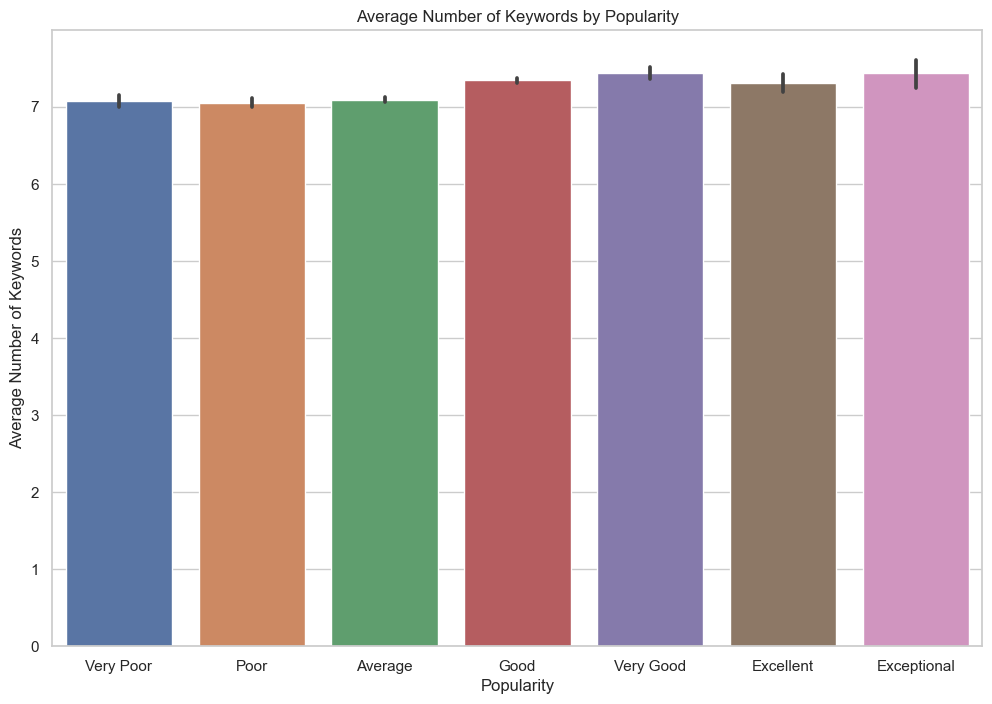

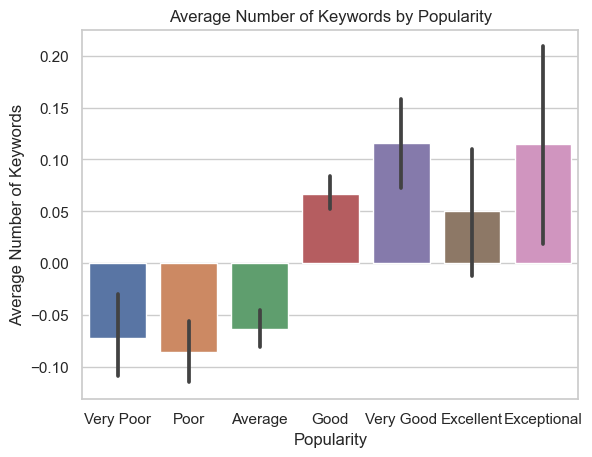

In [31]:
plt.figure(figsize=(12, 8))

# Bar plot of num_keywords by popularity
sns.barplot(x='popularity', y=' num_keywords', data=df_old, order=['Very Poor', 'Poor', 'Average', 'Good', 'Very Good', 'Excellent', 'Exceptional'])

plt.title('Average Number of Keywords by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Number of Keywords')
plt.show()

# Bar plot using normalized data to more easily see variations
sns.barplot(x='popularity', y=' num_keywords', data=df, order=['Very Poor', 'Poor', 'Average', 'Good', 'Very Good', 'Excellent', 'Exceptional'])

plt.title('Average Number of Keywords by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Number of Keywords')
plt.show()

We can see that usualy, popular articles have slightly more keywords than their less popular counterparts. Although the difference is small, it is consistent between popularity categories.

## Number of Images

We will now analyse how the number of images per article impacts how successful it is.

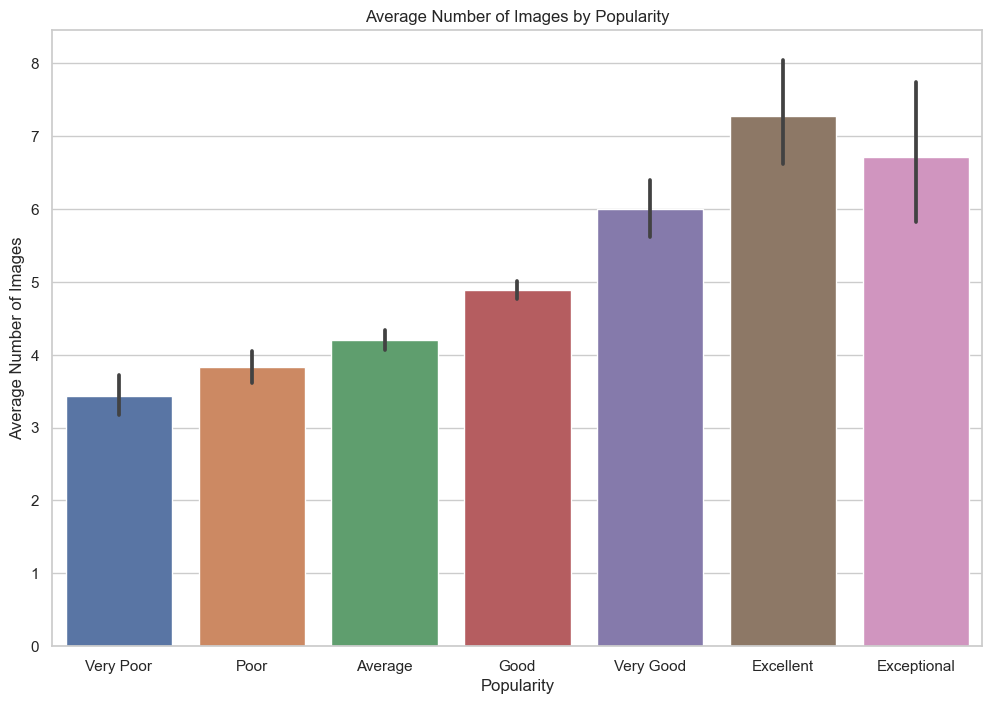

In [32]:
plt.figure(figsize=(12, 8))

# Bar plot of num_imgs by popularity
sns.barplot(x='popularity', y=' num_imgs', data=df_old, order=['Very Poor', 'Poor', 'Average', 'Good', 'Very Good', 'Excellent', 'Exceptional'])

plt.title('Average Number of Images by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Number of Images')
plt.show()

As we can see, the number of images per articles directly affects popularity, with low popularity articles having arround 3.5 images on average against high popularity articles's 6.5.
As a result, we can conclude that a high number of images help an article perform better.

## Number of Videos

Let's do the same for videos : 

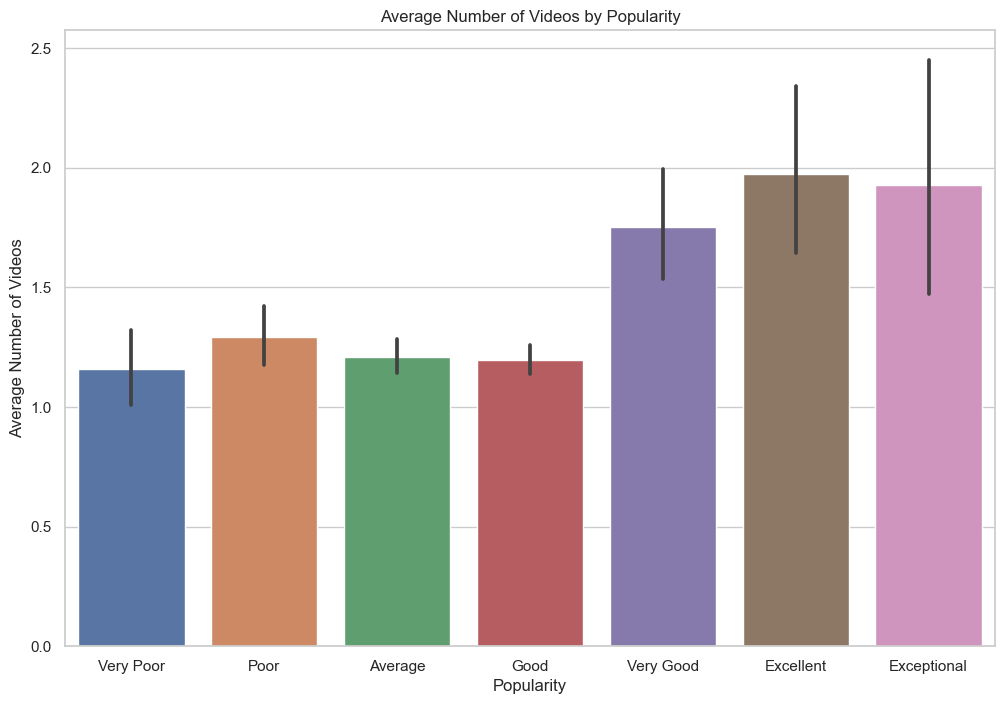

In [33]:
plt.figure(figsize=(12, 8))

# Bar plot of num_videos by popularity
sns.barplot(x='popularity', y=' num_videos', data=df_old, order=['Very Poor', 'Poor', 'Average', 'Good', 'Very Good', 'Excellent', 'Exceptional'])

plt.title('Average Number of Videos by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Number of Videos')
plt.show()

Same as for images, there is no doubt that a high videos definitely helps to increase the popularity of an article.

## Number of Links

Now for the number of links or references in the article :

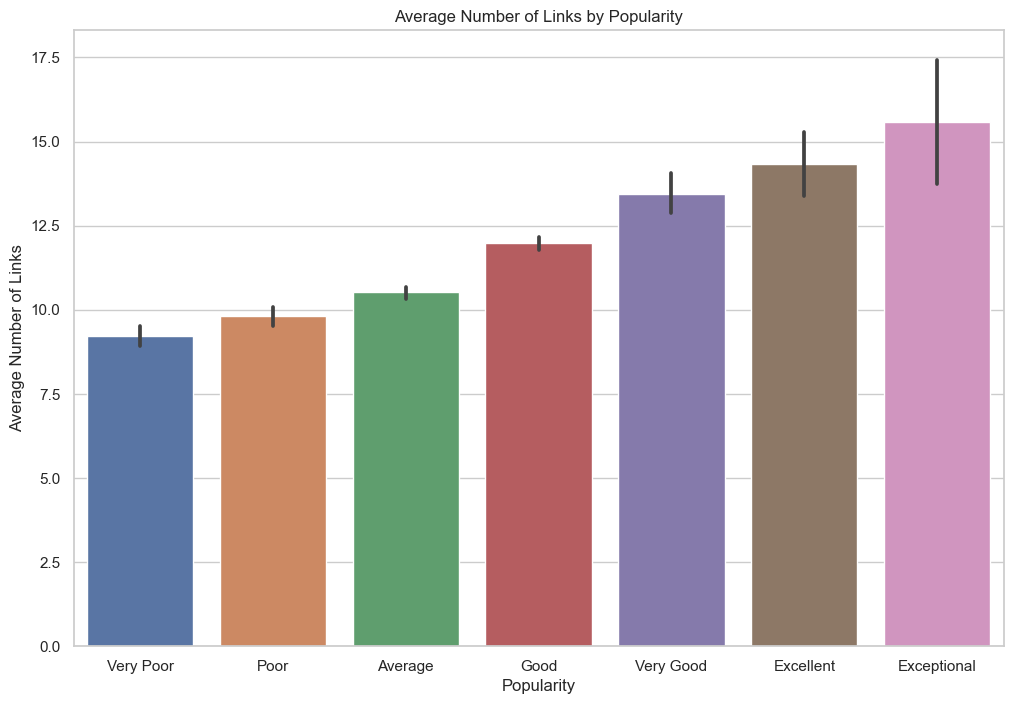

In [34]:
plt.figure(figsize=(12, 8))

# Bar plot of num_hrefs by popularity
sns.barplot(x='popularity', y=' num_hrefs', data=df_old, order=['Very Poor', 'Poor', 'Average', 'Good', 'Very Good', 'Excellent', 'Exceptional'])

plt.title('Average Number of Links by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Number of Links')
plt.show()

Again, we can see a decisive rise in popularity for articles with many links in them.

## Polarity

Polarity is a measurment of how positive or negative key words are in the articles. Let's see if it impacts how well the article is recieved : 

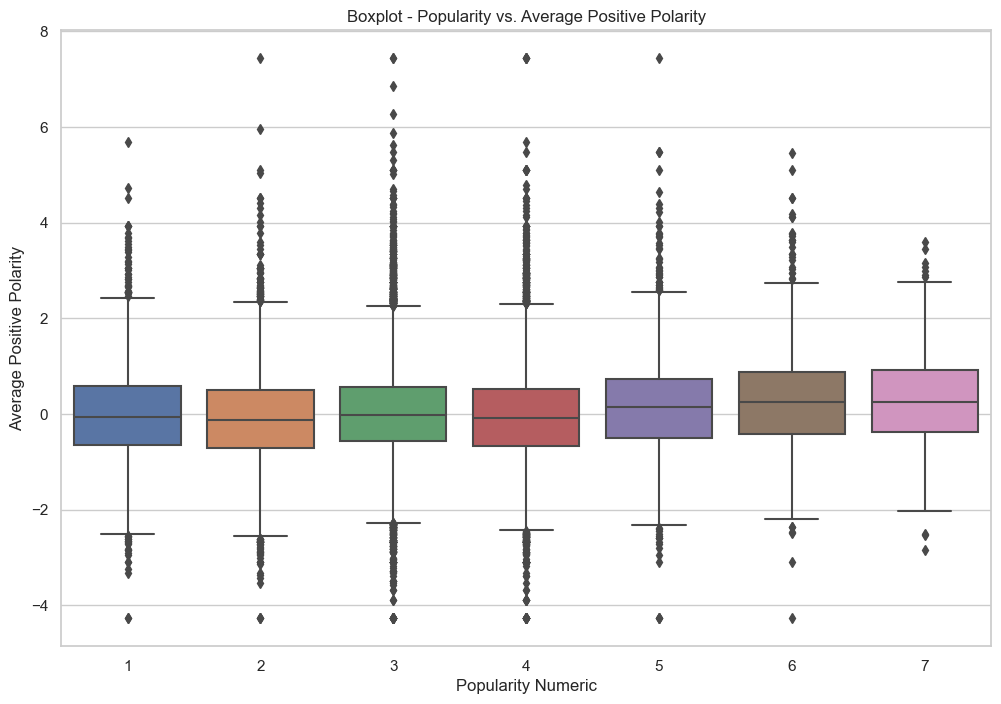

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Boxplot of avg_positive_polarity by popularity_numeric
sns.boxplot(x='popularity_numeric', y=' avg_positive_polarity', data=df_copy)
plt.title('Boxplot - Popularity vs. Average Positive Polarity')
plt.xlabel('Popularity Numeric')
plt.ylabel('Average Positive Polarity')

plt.show()

We can indeed notice a slight but non negligible increase of the average positive polarity of words for high popularity articles, as a result, using positive words (maybe by talking about a positive subject) can increase likelyhood that the article will be successful.

What about Negative polarity?

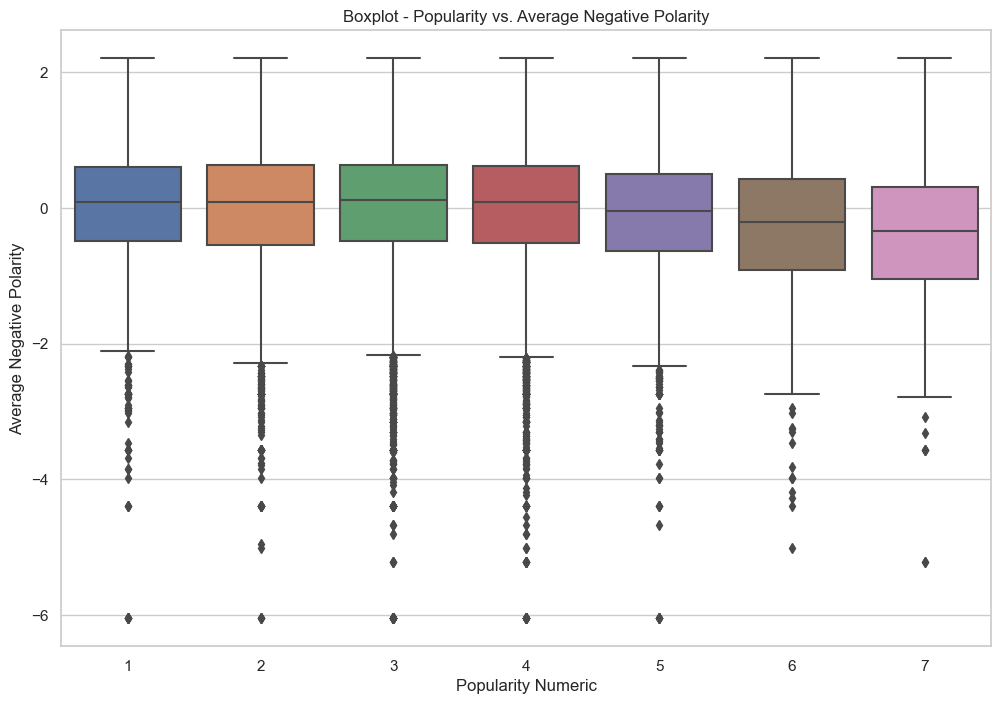

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Boxplot of avg_negative_polarity by popularity_numeric
sns.boxplot(x='popularity_numeric', y=' avg_negative_polarity', data=df_copy)
plt.title('Boxplot - Popularity vs. Average Negative Polarity')
plt.xlabel('Popularity Numeric')
plt.ylabel('Average Negative Polarity')

plt.show()

As we can see, this graph supports our previous hypothesis by suggesting that negative words are less present in high popularity articles

## Subjectivity

Let's analyse how the subjectivity of an article can influence it's popularity :

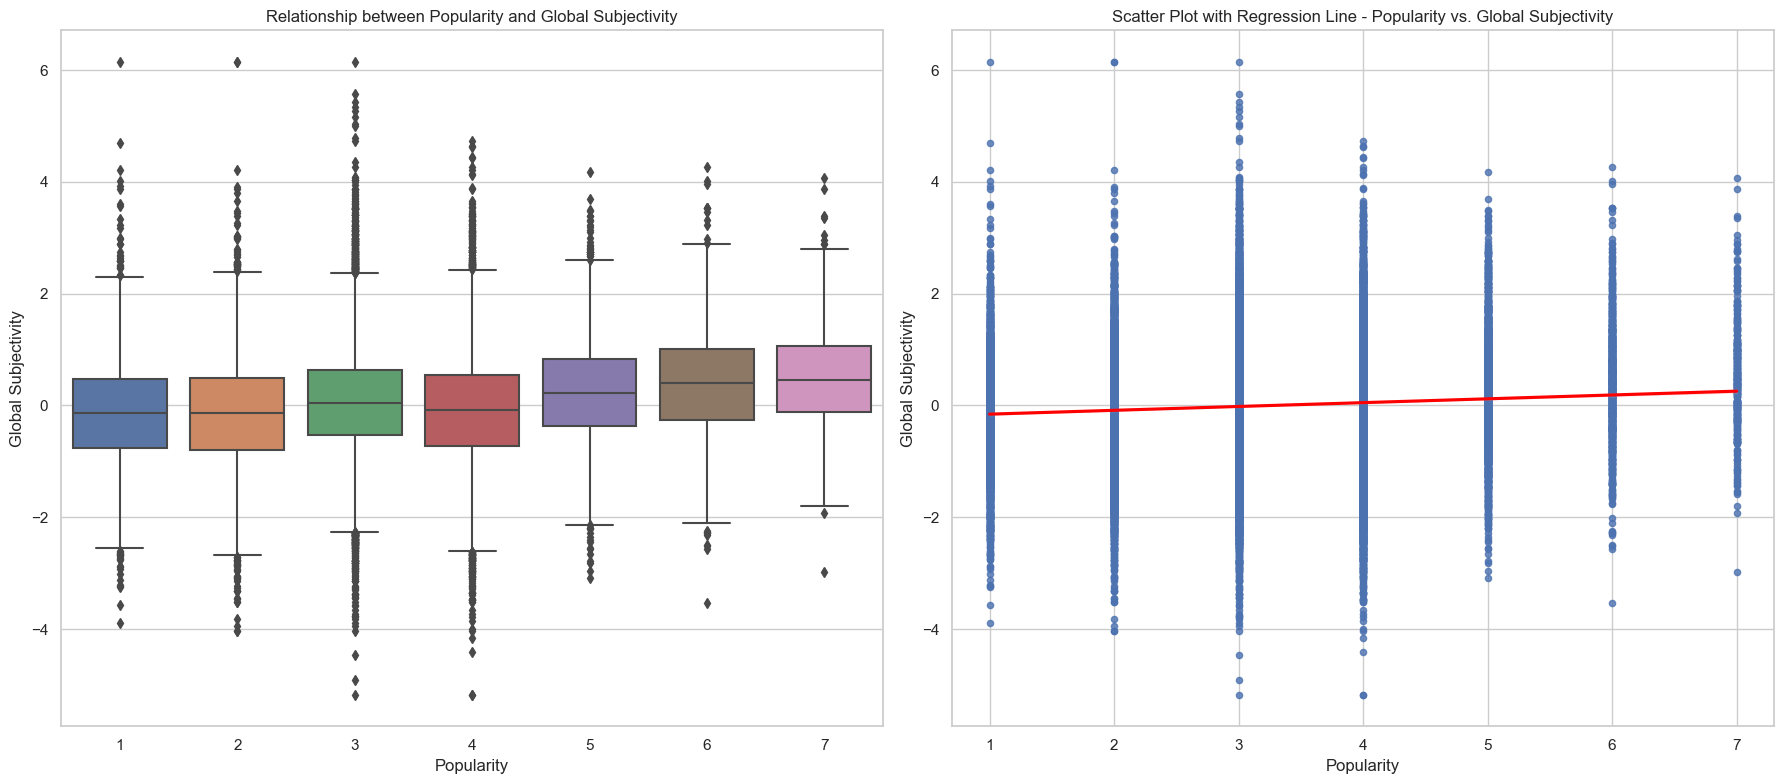

In [37]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Boxplot of global_subjectivity by popularity_numeric
sns.boxplot(x='popularity_numeric', y=' global_subjectivity', data=df_copy, ax=axes[0])
axes[0].set_title('Relationship between Popularity and Global Subjectivity')
axes[0].set_xlabel('Popularity')
axes[0].set_ylabel('Global Subjectivity')

# Let's also visualize this correlation using a linear regression
# Scatter plot with regression line
sns.regplot(x='popularity_numeric', y=' global_subjectivity', data=df_copy, scatter_kws={'s': 20}, line_kws={'color': 'red'}, ax=axes[1])

axes[1].set_title('Scatter Plot with Regression Line - Popularity vs. Global Subjectivity')
axes[1].set_xlabel('Popularity')
axes[1].set_ylabel('Global Subjectivity')

plt.tight_layout()
plt.show()

We do notice that on average, articles with a higher popularity generaly are more subjective than low popularity articles, therefore, it seems that people more likely to share articles that express or at least are influenced by a certain opinion or belief (most likely aligned with their own). It would seem that readers on average migth view objective articles as bland and unatractive.

## Conclusion

After analyzing what parameters were correlated with the number of shares that an article recieved, we noticed several important factors:
- Day it was Published :
    Indeed, articles released on the weekends were significantly more popular than those published on weekdays
- Category or Subject :
    The most shared articles are those from the "other" category and not the usual ones
- Word Length :
    Articles with a sub-optimal average word length were far less likely to be very popular
- Number of Keywords :
    We noticed that articles with higher popularity had slightly more keywords on average than the others
- Number of Images, Videos, and Links :
    High numbers of Images, Videos, and Links direcly impacts the average popularity of an article
- Polarity :
    Articles with positive subjects and words are more likely to get better ratings, and the opposite for negative words
- Subjectivity :
    We concluded that readers prefered to share articles that were subjective rather than objective

# Supervised Learning Classification using scikit learn

The goal of this part is to apply some machine learning models such as KNeighborsClassifier or RandomForestClassifier on our dataset to classify an article popularity. We may explore hyperparameter tuning to optimize the KNeighborsClassifier's parameters for better performance. This involves systematically adjusting the model's settings to find the configuration that maximizes predictive accuracy.

The k-neighbors classifier predicts the class of a data point based on the majority class among its k-nearest neighbors in the feature space.

The RandomForestClassifier is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes for classification tasks or the average prediction for regression tasks.

First of all we will create a copy of the DataFrame (df) without the 'shares' column, and then we will extract the training set from the modified DataFrame, excluding the last column (' shares'). 

In [38]:
from copy import copy
# we don't need the shares column for the classification
data_without_shares = df.drop(labels=[' shares'], axis = 1, inplace=False)

training_set = data_without_shares.iloc[:, :(data_without_shares.shape[1]-1)] #selects all rows and all columns, but not the last column of the DataFrame (popularity)

In [39]:
data_without_shares #dataframe without the shares column but still the popularity

timedelta   n_tokens_title  ...   abs_title_sentiment_polarity  popularity
0        1.741852         0.765258  ...                       0.144352   Very Poor
1        1.741852        -0.654006  ...                      -0.686644        Poor
2        1.741852        -0.654006  ...                      -0.686644        Good
3        1.741852        -0.654006  ...                      -0.686644     Average
4        1.741852         1.238345  ...                      -0.082284   Very Poor
...           ...              ...  ...                            ...         ...
39639   -1.656179         0.292170  ...                      -0.686644        Good
39640   -1.656179         0.765258  ...                       3.745333        Good
39641   -1.656179        -0.180918  ...                      -0.082284        Good
39642   -1.656179        -2.073269  ...                      -0.686644     Average
39643   -1.656179        -0.180918  ...                       0.421350     Average

[38463 rows x 48 columns]

In [40]:
training_set #we can see the dataframe without the popularity colmun

timedelta  ...   abs_title_sentiment_polarity
0        1.741852  ...                       0.144352
1        1.741852  ...                      -0.686644
2        1.741852  ...                      -0.686644
3        1.741852  ...                      -0.686644
4        1.741852  ...                      -0.082284
...           ...  ...                            ...
39639   -1.656179  ...                      -0.686644
39640   -1.656179  ...                       3.745333
39641   -1.656179  ...                      -0.082284
39642   -1.656179  ...                      -0.686644
39643   -1.656179  ...                       0.421350

[38463 rows x 47 columns]

Now that we have our training data to work with, we can see that there is still string values : we need to convert those values into numerical ones so we are using pd.get_dummies that is a pandas functiun that will create a binary (0 or 1) representation for each category. We now have both our training set and label-set ready to be used. 

In [41]:
# convert categorical variables into dummy - it use one-hot encoding
training_set = pd.get_dummies(training_set)

# extract the label data in this case popularity
label_set = data_without_shares.iloc[:, (data_without_shares.shape[1]-1):].values

data_feature2 = copy(training_set) #copying the training_set for later

In [42]:
training_set #we can see how the string values were modified using get_dummies

timedelta   n_tokens_title  ...  data_channel_Tech  data_channel_World
0        1.741852         0.765258  ...                  0                   0
1        1.741852        -0.654006  ...                  0                   0
2        1.741852        -0.654006  ...                  0                   0
3        1.741852        -0.654006  ...                  0                   0
4        1.741852         1.238345  ...                  1                   0
...           ...              ...  ...                ...                 ...
39639   -1.656179         0.292170  ...                  1                   0
39640   -1.656179         0.765258  ...                  0                   0
39641   -1.656179        -0.180918  ...                  0                   0
39642   -1.656179        -2.073269  ...                  0                   1
39643   -1.656179        -0.180918  ...                  0                   0

[38463 rows x 59 columns]

In [43]:
label_set #we can see every popularity for each article

array([['Very Poor'],
       ['Poor'],
       ['Good'],
       ...,
       ['Good'],
       ['Average'],
       ['Average']], dtype=object)

We already did the standard scaler now we only need to encode the labeel_set so that we can have numerical values.

In [44]:
# encoding the label set with a label encoder
from sklearn.preprocessing import LabelEncoder

labelEn = LabelEncoder()
encoded_labels = labelEn.fit_transform(df.loc[:, 'popularity'].values)
class_names = labelEn.classes_

In [45]:
encoded_labels #here we have the label_set with all numerical values

array([6, 4, 3, ..., 3, 0, 0])

In [46]:
print(class_names) #we can see that we have all the popularity types based on the number associated with a popularity type. For example on the first line '6' was attributed by the encoder so we can see that it corresponds to 'Very poor'

['Average' 'Excellent' 'Exceptional' 'Good' 'Poor' 'Very Good' 'Very Poor']


We are almost finished with the preparation of our data to apply classification algorithms, we now need to split the data into a 'training' and 'testing' datasets. We are taking 70% of the dataset for training and the rest (30% so test_size=0.3) for testing. We have X and y represented by data_feature2 and by encoded_labels. 

In [47]:
# Splitting the data for Training and Testing
from sklearn.model_selection import train_test_split, GridSearchCV

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_feature2, encoded_labels, test_size=0.3, shuffle=False)

Let's import these metrics for later: accuracy_score and make_score 
- accuracy_score: takes two arguments—the true labels and the predicted labels—and returns a floating-point number representing the accuracy
- make_score: used with the GridSearchCV function (GridSearchCV performs hyperparameter tuning by searching over a specified parameter grid and using cross-validation to evaluate the model's performance)

In [48]:
from sklearn.metrics import accuracy_score, make_scorer

## K-Nearest Neighbors

The classification of a data point is determined by the majority class among its k-nearest neighbors in the feature space. 

In [49]:
# defining the model
from sklearn.neighbors import KNeighborsClassifier

# Define a range of values for the hyperparameter 'n_neighbors'
k_range = np.arange(1,100)
# Initialize an empty list to store accuracy scores for different 'n_neighbors' values
accuracy = []

# Loop through the specified range of 'n_neighbors'
for n in k_range:    
    # Create a KNeighborsClassifier with the current 'n_neighbors' value
    neigh = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
    
    # Fit the model on the training data
    neigh.fit(X_train_2, y_train_2)  

    # predict the result
    y_pred = neigh.predict(X_test_2)
    
    # Calculate the accuracy score for the current 'n_neighbors' value and append it to the list
    accuracy.append(100*accuracy_score(y_pred, y_test_2))

The code iterates over a range of n_neighbors values, fits a KNN classifier for each value, predicts labels on the test set, calculates the accuracy score using accuracy_score, and stores the accuracy scores in the list accuracy. We are doing this to see what is the most optimal number of neighbors. To visualize this we are going to make a graph which looks at the accuracy based on the number of neighbors. We are juste taking the list of the accuracy scores and using plotlib.

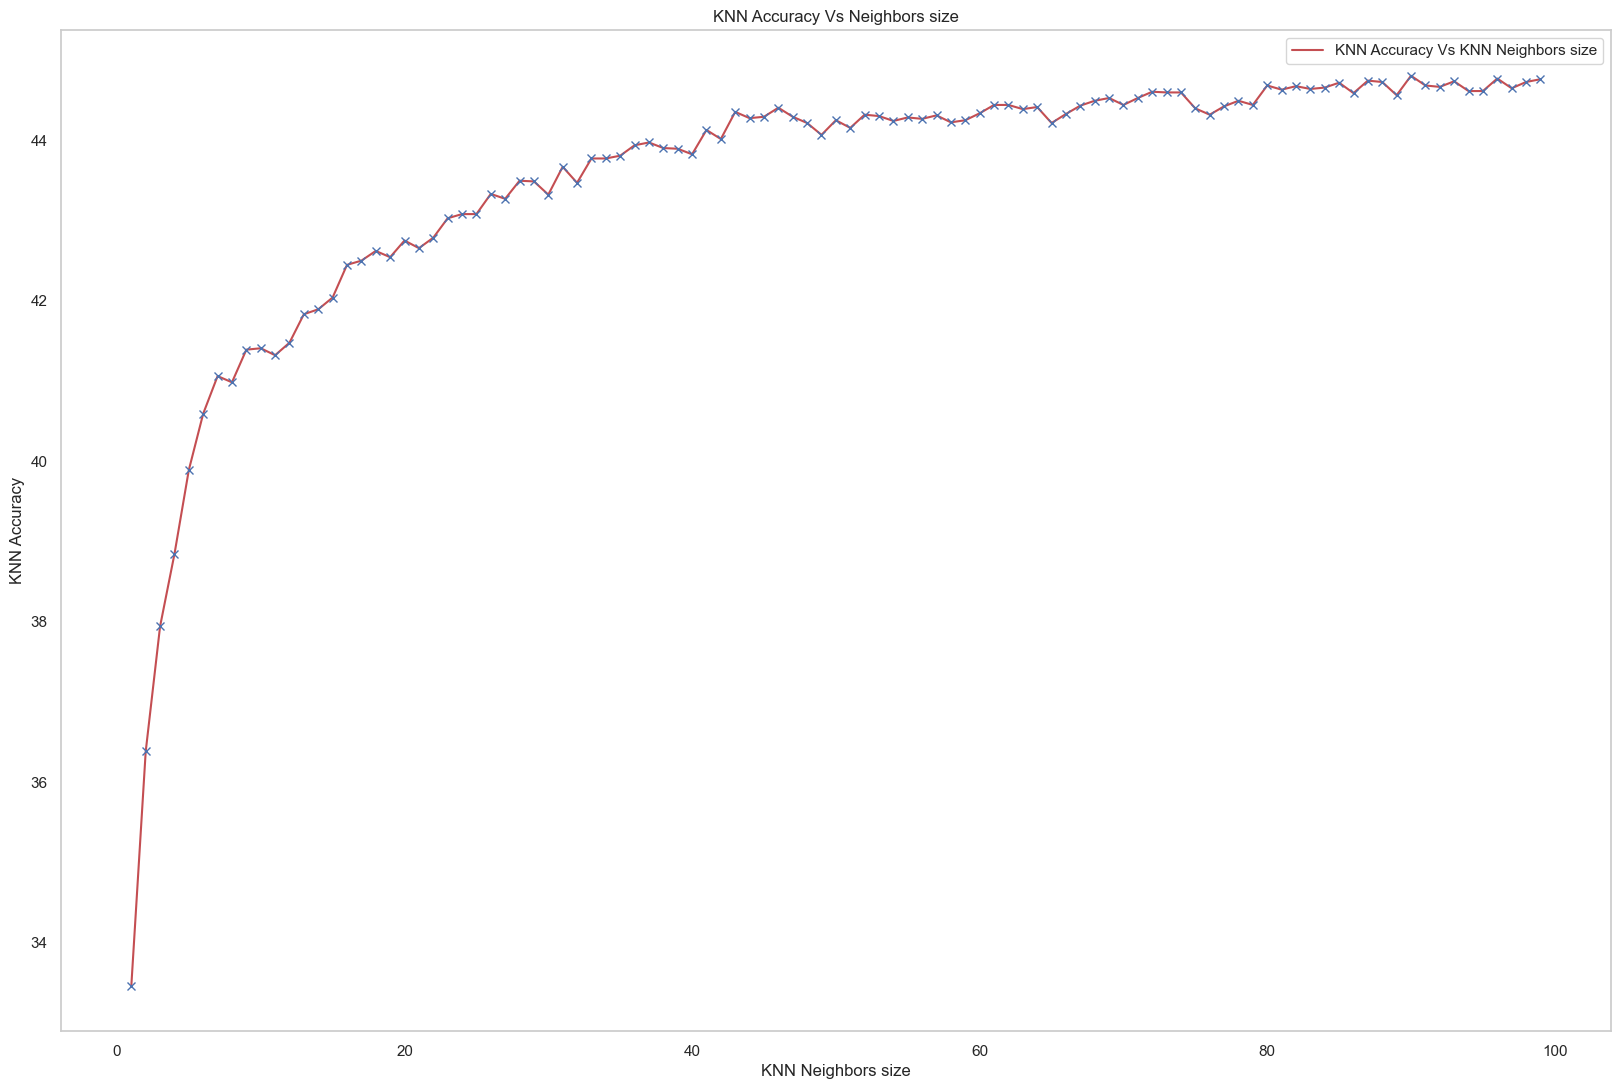

In [50]:
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(20, 13))
# Plot the accuracy scores against the values of 'n_neighbors'
plt.plot(k_range, accuracy, 'r-', label='KNN Accuracy Vs KNN Neighbors size')
# Mark the data points on the plot
plt.plot(k_range, accuracy, 'bx')
# Set the x-axis label
plt.xlabel('KNN Neighbors size')
# Set the y-axis label
plt.ylabel('KNN Accuracy')
# Display the legend indicating the meaning of the plotted line and points
plt.legend()
# Add a grid to the plot
plt.grid()
# Set the title of the plot
plt.title('KNN Accuracy Vs Neighbors size')
# Display the plot
plt.show()

In [51]:
print(max(accuracy))

44.804575786463296


The KNN model which gave the best accuracy of 44.8% was based on using the all the data-set feature and number of neighbor of 90. 

The goal now is to see if randomn forest classifier is better than KNN in terms of accuracy.

## Random Forest Classifier

Random Forest builds multiple decision trees by sampling data and features, and it outputs the mode of class predictions for classification or the average prediction for regression, leveraging the ensemble to enhance accuracy and robustness. Its strength lies in the combination of diverse trees, each trained on different subsets, which collectively contributes to a more effective and resilient model.

Let's implement it on the same training and test data.

In [52]:
# Importing the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# List of different numbers of estimators (trees) to experiment with
nns = [1, 5, 10, 50, 100, 200, 500]

# Initialize an empty list to store accuracy scores for different numbers of estimators
accuracy = []

# Loop through the specified number of estimators
for n in nns:    
    # Create a RandomForestClassifier with the current number of estimators and other parameters
    clf = RandomForestClassifier(n_estimators=n, n_jobs=5, max_depth=50, random_state=0)
    
    # Fit the model on the training data
    clf.fit(X_train_2, y_train_2)  

    # Predict the labels for the test set
    y_pred = clf.predict(X_test_2)
    
    # Calculate the accuracy score for the current number of estimators and append it to the list
    accuracy.append(100 * accuracy_score(y_pred, y_test_2))


Like we did for knn let's look at how it turns out with matplot.

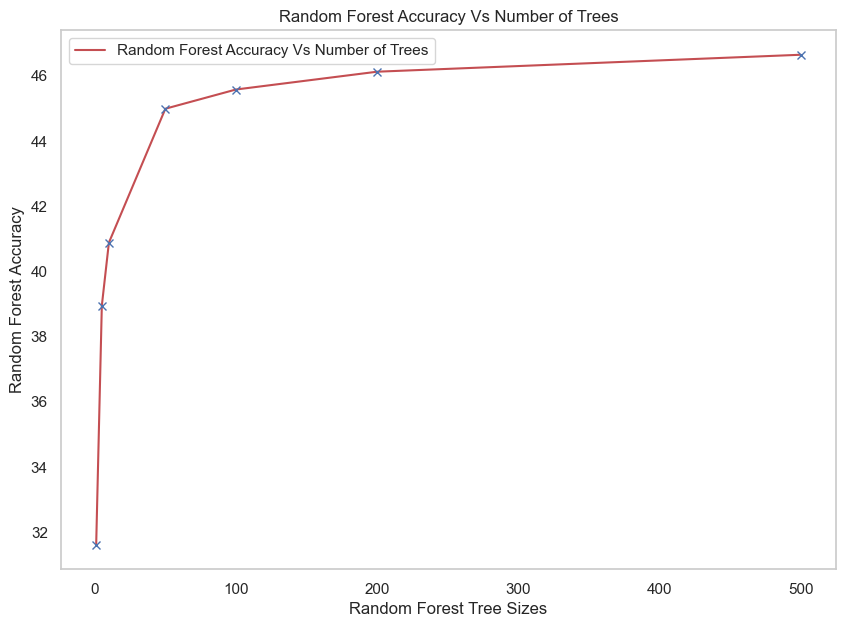

In [53]:
# Set the size of the figure
plt.figure(figsize=(10, 7))

# Plot the accuracy scores against the number of trees in the Random Forest
plt.plot(nns, accuracy, 'r-', label='Random Forest Accuracy Vs Number of Trees')

# Mark the data points on the plot
plt.plot(nns, accuracy, 'bx')

# Set the x-axis label
plt.xlabel('Random Forest Tree Sizes')

# Set the y-axis label
plt.ylabel('Random Forest Accuracy')

# Display the legend indicating the meaning of the plotted line and points
plt.legend()

# Add a grid to the plot
plt.grid()

# Set the title of the plot
plt.title('Random Forest Accuracy Vs Number of Trees')

# Display the plot
plt.show()

In [54]:
print(accuracy)

[31.614524655516075, 38.946182511482796, 40.878758991247075, 44.986567293526306, 45.57587312592079, 46.1218476471098, 46.64182338157553]


Random Forest has the best result for this classification task reaching an accuracy of 46.6%.

Let's add a function that will print the confusion matrix.

In [55]:
# Importing necessary functions and modules
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Define a function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Set a default title if not provided
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    
    # Normalize the confusion matrix if specified
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Print the confusion matrix
    print(cm)

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the confusion matrix
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Add colorbar
    ax.figure.colorbar(im, ax=ax)
    
    # Set axis ticks and labels
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes, yticklabels=classes,
        title=title,
        ylabel='True label',
        xlabel='Predicted label'
    )

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    fmt = '.32f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    # Adjust layout for better appearance
    fig.tight_layout(pad=5, rect=(0, 0, 1, 1))
    
    return ax

Now let's see for Randomn Forest the confusion matrix so that we can look at the predicted classifications against the true classifications, providing a detailed breakdown of the Random Forest across Popularity labels. 

[[2252    0    0 1741   14    0    0]
 [  46    0    0  155    0    0    0]
 [  20    0    0   71    0    0    0]
 [1265    0    0 3119    6    0    0]
 [1106    0    0  443   11    0    0]
 [ 117    0    0  387    0    0    0]
 [ 563    0    0  215    8    0    0]]


<AxesSubplot: title={'center': 'Confusion matrix For Random Forest'}, xlabel='Predicted label', ylabel='True label'>

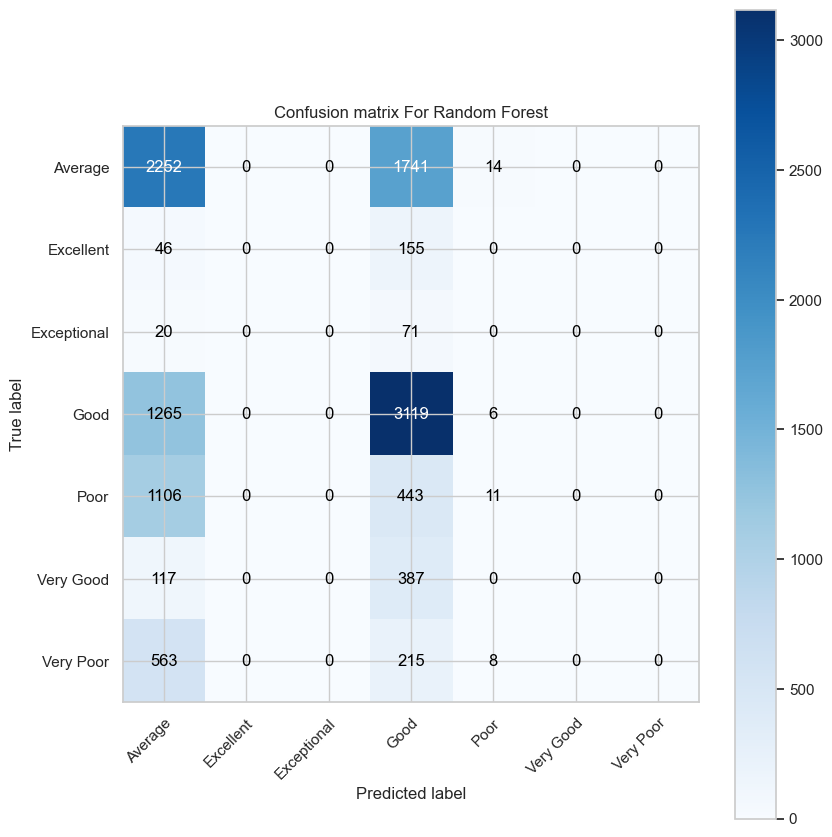

In [56]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_2, y_pred, classes=class_names,
                      title='Confusion matrix For Random Forest')

The Random Forest model performed the best, achieving 46.6% accuracy on the test dataset. The lower accuracy can be attributed to the dataset's significant variation and imbalanced distribution of popularity classes, leading the prediction models to favor classes with more articles.